In [2]:
import numpy as np
import pandas as pd
from PIL import Image  #converting images into arrays

In [3]:
#!conda install -c anaconda xlrd --yes
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print('Data download and read into a dataframe!')

Data download and read into a dataframe!


In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
print(df_can.shape)

(195, 43)


In [6]:
#clean up the dataset to remove unnecessary columns (eg. REG)
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

#let's rename the columns so that they make sence
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

#for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

#set the country name as index - usefil for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

#add total column
df_can['Total'] = df_can.sum(axis=1)

#years that we will be using in this lesson
years = list(map(str, range(1980,2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [7]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches   #needed for waffle charts

mpl.style.use('ggplot')

print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  2.2.2


In [8]:
df_dsn = df_can.loc[['Denmark','Norway','Sweden'], :]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [9]:
#step1. create of each category with respect to the total
#compute the proportion of each category with respect to the total
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value)/total_values) for value in df_dsn['Total']] 

#print out proportions
for i, proportion in enumerate(category_proportions):
    print(df_dsn.index.values[i] + ':' + str(proportion))

Denmark:0.32255663965602777
Norway:0.1924094592359848
Sweden:0.48503390110798744


In [10]:
#step2. define the overall size of the waffle chart.
width = 40
height = 10
total_num_tiles = width * height
print('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [11]:
#step3. use the proportion of each category to determine it respective number of tiles
#compute the number of tiles for each category
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

#print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i] + ':' + str(tiles))

Denmark:129
Norway:77
Sweden:194


In [12]:
#step4. create a matric that resembles the waffle chart and populate it
#initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height,width))

#define indices to look through waffle chart
category_index = 0
tile_index = 0

#populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1
        #if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            #...proceed to the next category
            category_index += 1
        #set the class value to an integer, which increases with class
        waffle_chart[row,col] = category_index

print('Waffle chart populated!')        

Waffle chart populated!


In [13]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

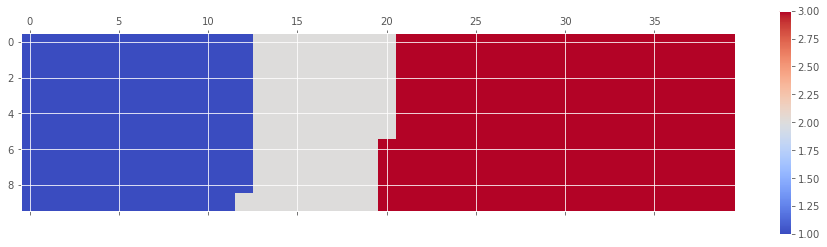

In [14]:
#step 5. map the waffle chart matrix into a visual
#instantiate a new figure object
fig = plt.figure()

#use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], <a list of 0 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

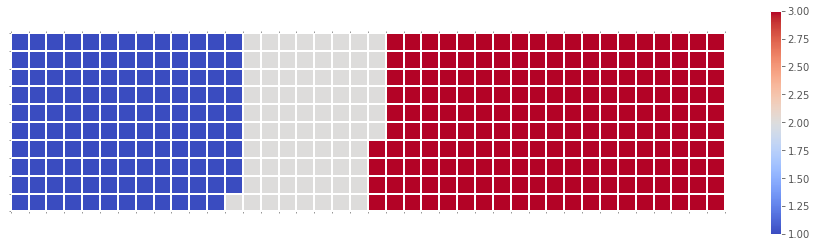

In [15]:
#step 6. Prettify the chart
#instantiate a new figure object
fig = plt.figure()

#use matshow to display waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

#get the axis
ax = plt.gca()

#set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

#add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

<Figure size 432x288 with 0 Axes>

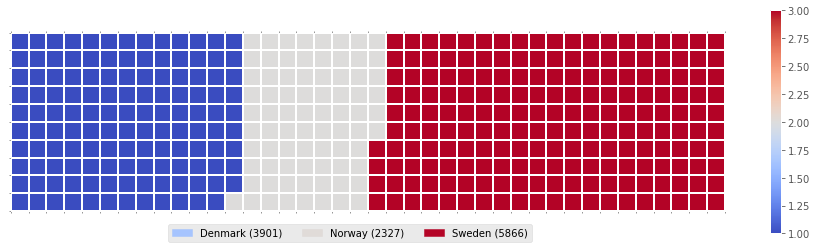

In [17]:
#step 7. create a legend and add it to chart
fig = plt.figure()

#use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

#get the axis
ax = plt.gca()

#set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

#add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

#compute cummulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum)-1]

#create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

#add legend to chart
plt.legend(handles=legend_handles, loc='lower center', ncol=len(df_dsn.index.values), bbox_to_anchor=(0.,-0.2, 0.95,.1))

In [21]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):
    
    #compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value)/total_values) for value in values]
    
    #compute the total number of tiles
    total_num_tiles = width * height   #total number of tiles
    print('Total number of tiles is', total_num_tiles)
    
    #compute the number of tiles for each category
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]
    
    #print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print(df_dsn.index.values[i] + ':' + str(tiles))
        
    #initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height,width))
    
    #define indices to loop through waffle chart
    category_index = 0
    tile_index = 0
    
    #populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1
            
            #if the number of tiles populated for the current category
            #is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                category_index += 1
             
            #set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index

    #instantiate a new figure object
    fig = plt.figure()
    
    #use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()
    
    #get the axis
    ax = plt.gca()
    
    #set minor ticks
    ax.set_xticks(np.arange(-.5, (width),1), minor=True)
    ax.set_yticks(np.arange(-.5,(height),1), minor=True)
    
    #add gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    
    plt.xticks([])
    plt.yticks([])
    
    #compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) -1]
    
    #create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
        
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
        
    #add legend to chart
    plt.legend(handles=legend_handles, loc='lower center', ncol=len(categories), bbox_to_anchor=(0., -0.2, 0.95, .1))

In [22]:
width = 40
height = 10
categories = df_dsn.index.values
values = df_dsn['Total']
colormap = plt.cm.coolwarm  #color map class

Total number of tiles is 400
Denmark:129
Norway:77
Sweden:194


<Figure size 432x288 with 0 Axes>

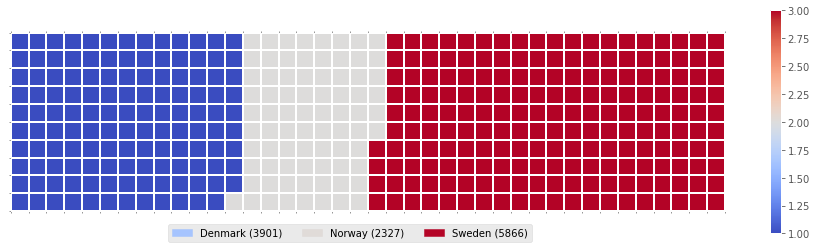

In [24]:
create_waffle_chart(categories, values, height, width, colormap)

In [28]:
#install wordcloud
#!conda install -c conda-forge wordcloud==1.4.1 --yes

#import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [29]:
#download file and save as alice_novel.txt
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt

#open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()

print('File downloaded and saved!')

File downloaded and saved!


In [31]:
#remove any redundant stopwords
stopwords = set(STOPWORDS)

In [33]:
#instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, stopwords=stopwords)

#generate the word cloud
alice_wc.generate(alice_novel)

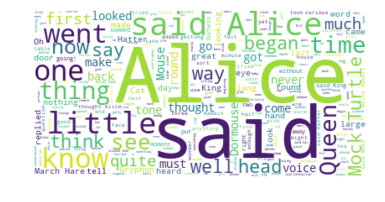

In [34]:
#display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

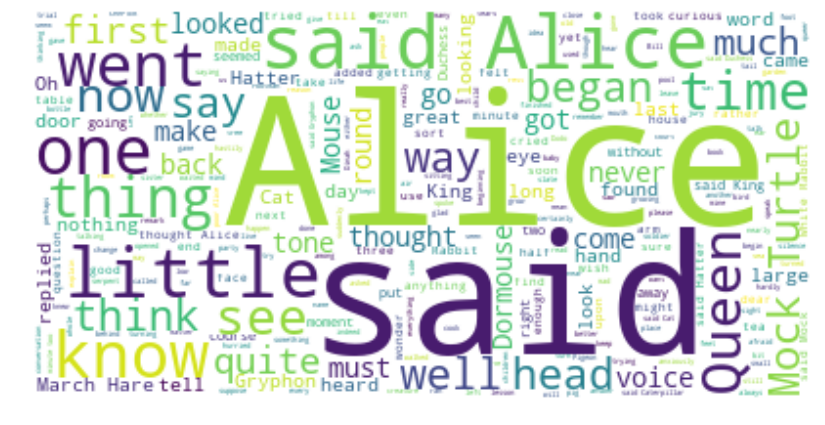

In [35]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

#display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

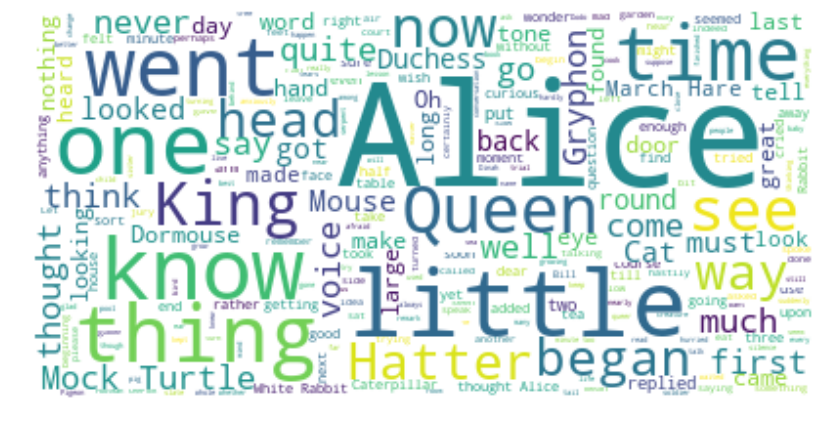

In [36]:
stopwords.add('said')  #add the words said to stopwords

#re-generate the word cloud
alice_wc.generate(alice_novel)

#display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [37]:
#download image
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/alice_mask.png
    
#save mask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))

print('Image downloaded and saved!')

Image downloaded and saved!


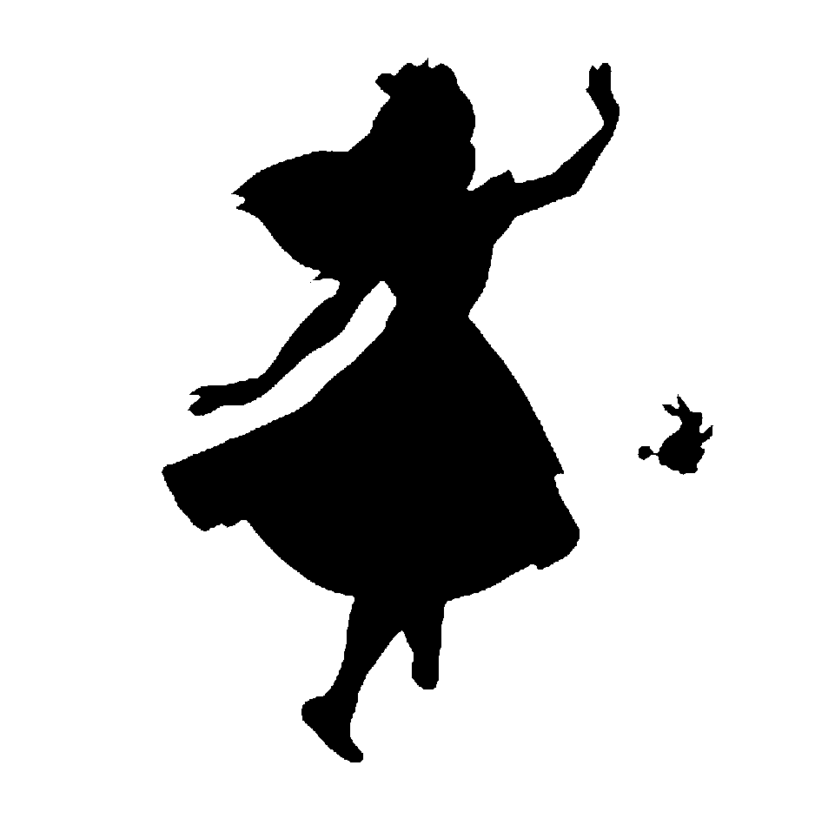

In [38]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

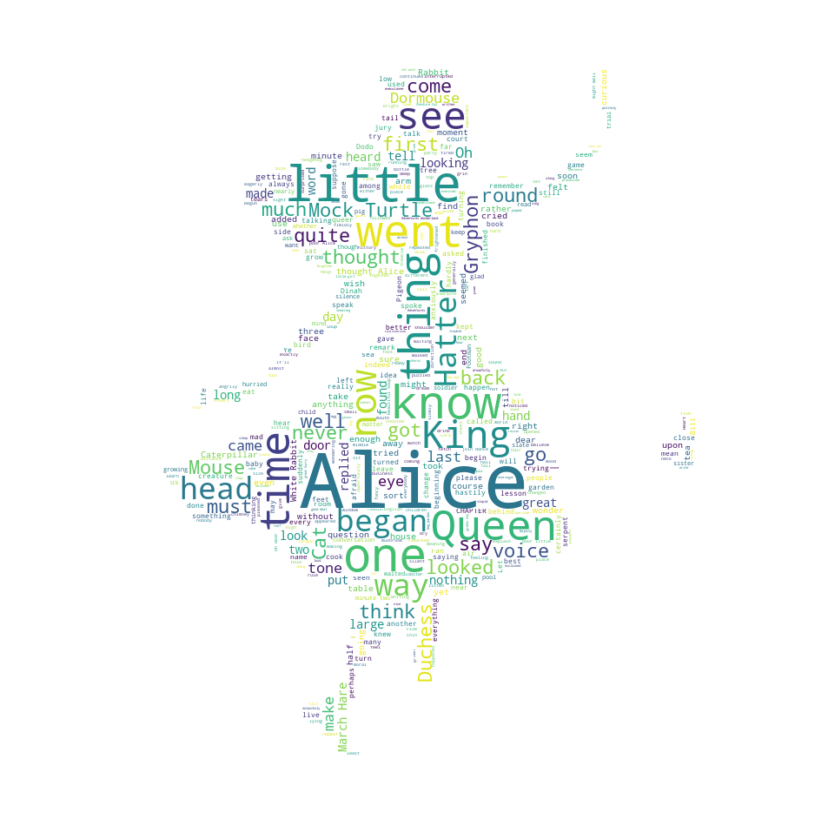

In [39]:
#instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

#generate the word cloud
alice_wc.generate(alice_novel)

#display the rowd cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [41]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [43]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    #check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

#display the generated text
word_string                            

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [44]:
#create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word Cloud created!')

Word Cloud created!


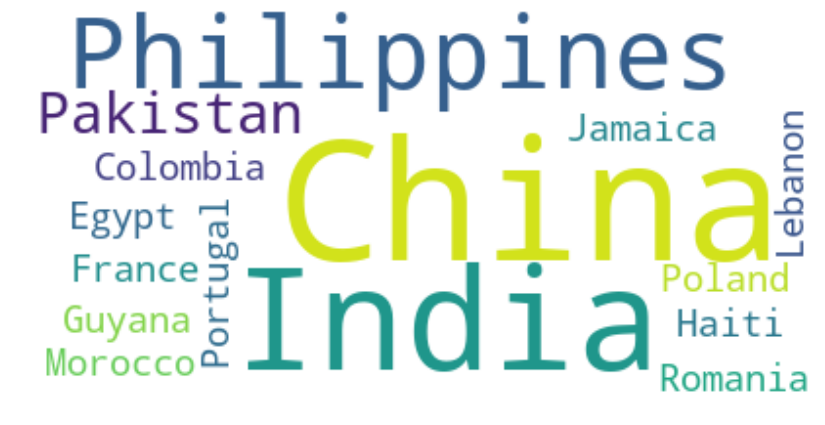

In [45]:
#display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [46]:
#install seaborn
!conda install -c anaconda seaborn --yes

#import library
import seaborn as sns

print('Seaborn installed and imported')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         156 KB  anaconda

The following packages will be UPDATED:

    certifi: 2019.11.28-py36_0 conda-forge --> 2019.11.28-py36_0 anaconda
    openssl: 1.1.1d-h516909a_0 conda-forge --> 1.1.1-h7b6447c_0  anaconda


certifi-2019.11.28   | 156 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: failed

CondaVerificationError: The package for openssl located at /home/jupyterlab/conda/pkgs/openssl-1.1.1-h7b6447c_0
appear

In [48]:
#we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

#change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

#reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

#rename columns
df_tot.columns = ['year', 'total']

#view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


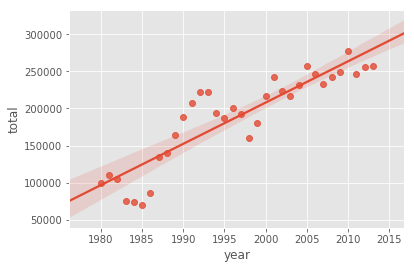

In [49]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

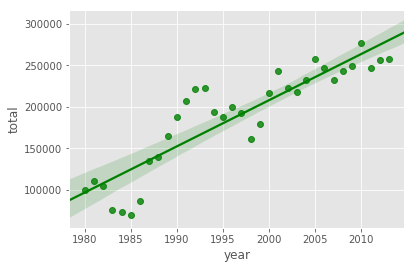

In [50]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

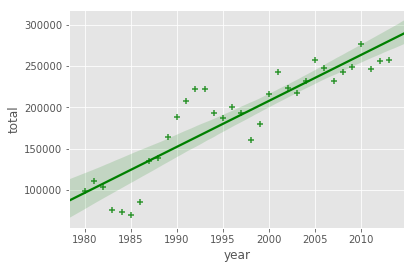

In [51]:
ax = sns.regplot(x='year', y='total', data=df_tot, color = 'green', marker='+')

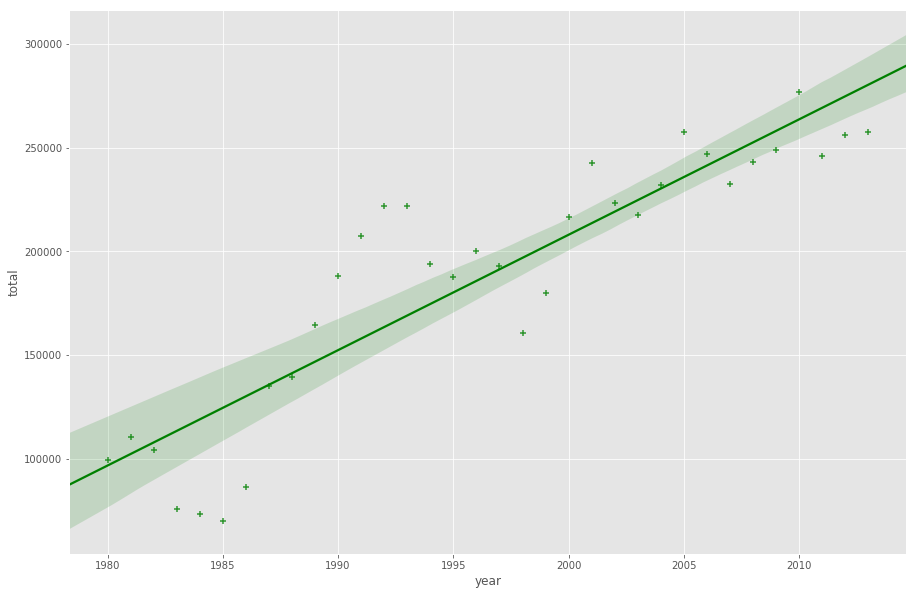

In [52]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_tot, color = 'green', marker='+')

Text(0.5,1,'Total Immigration to Canada from 1980 - 2013')

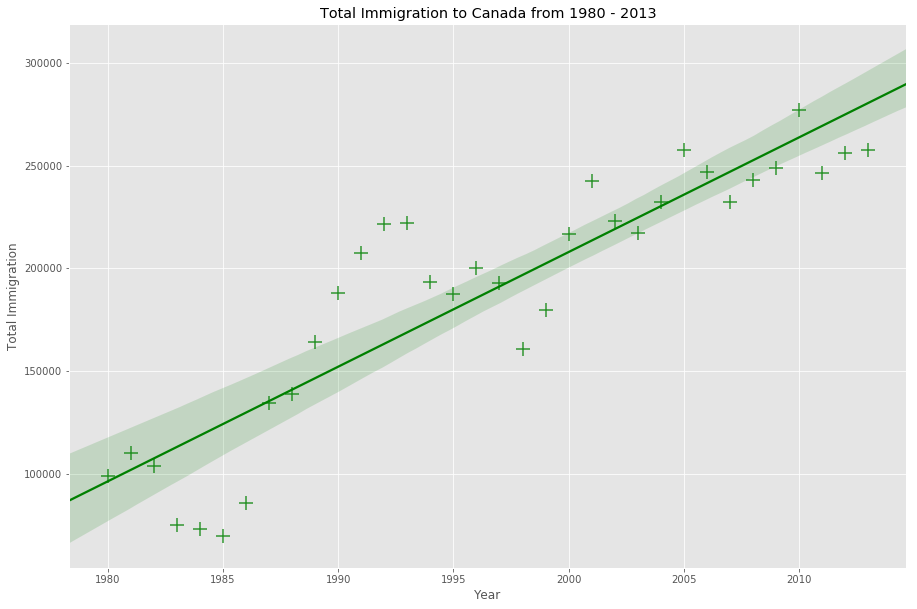

In [53]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')  #add x- nd y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5,1,'Total Immigration to Canada from 1980 - 2013')

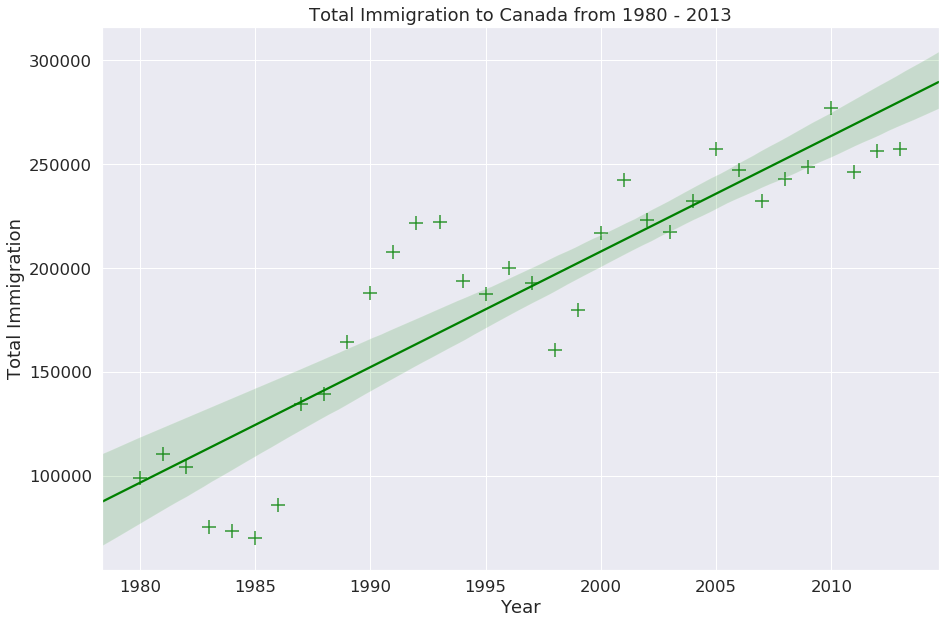

In [54]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel='Total Immigration')  #add x- nd y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5,1,'Total Immigration to Canada from 1980 - 2013')

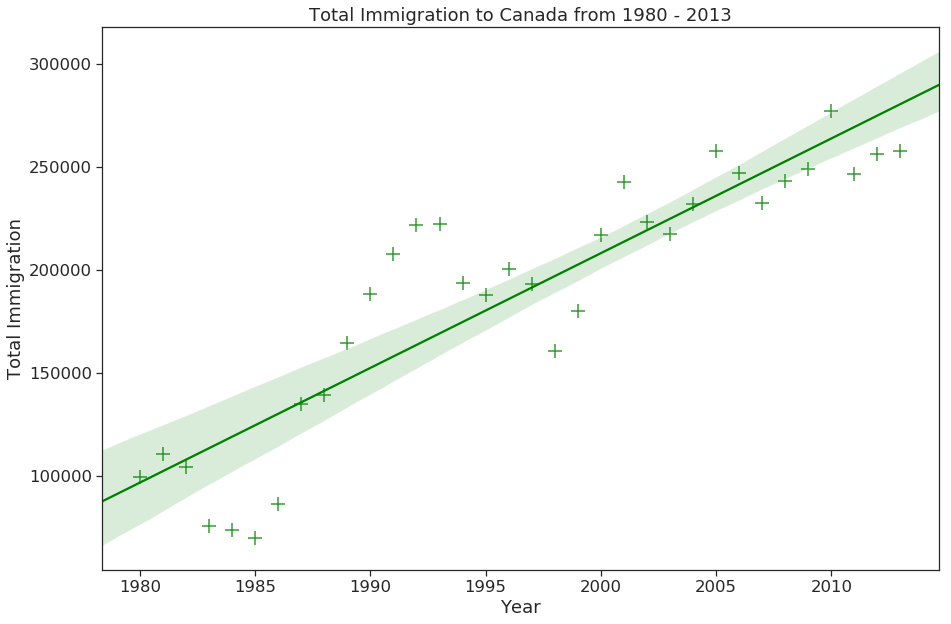

In [55]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('ticks')  #change background to white backgroud

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel='Total Immigration')  #add x- nd y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5,1,'Total Immigration to Canada from 1980 - 2013')

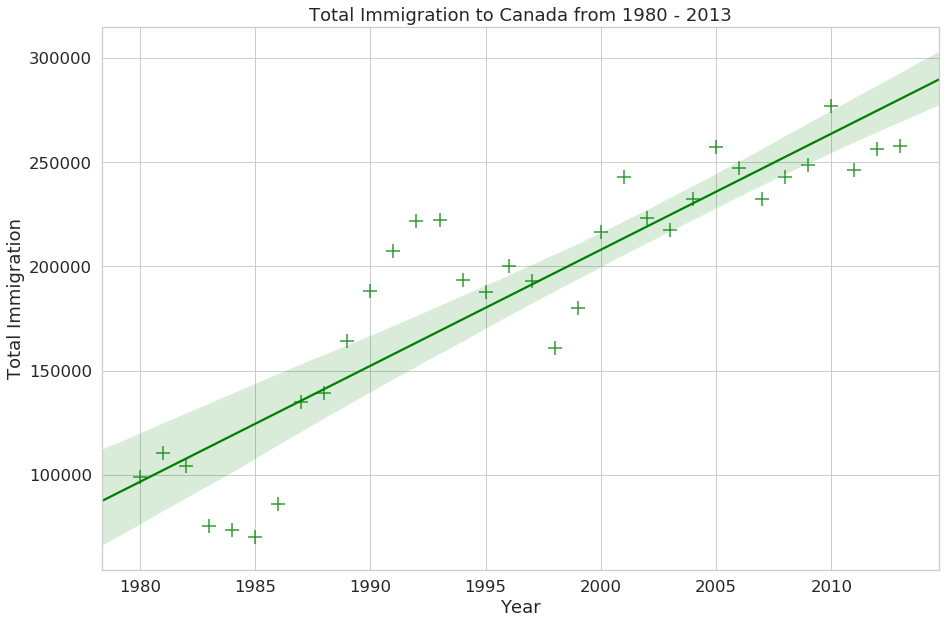

In [56]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')  

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel='Total Immigration')  #add x- nd y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5,1,'Total Immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

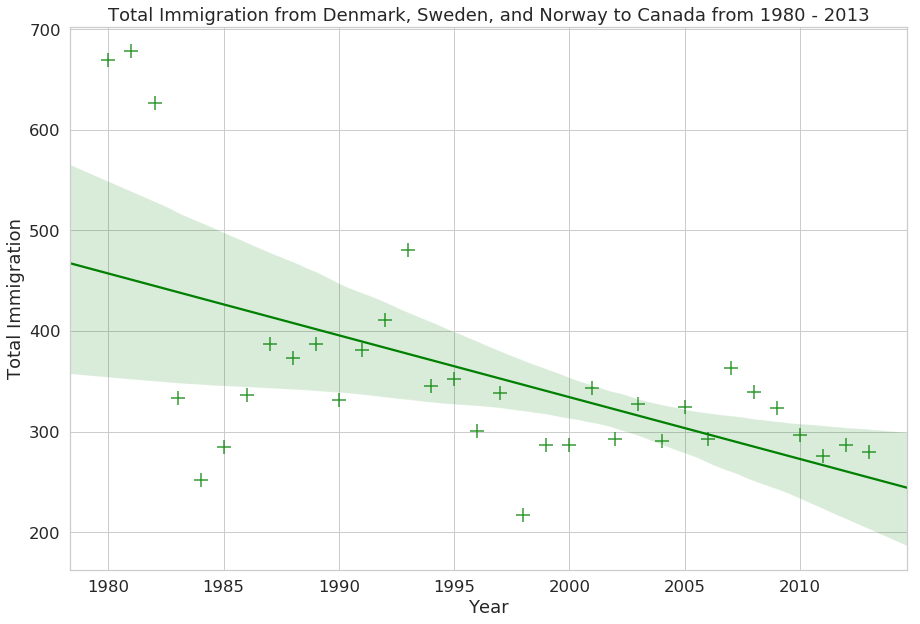

In [58]:
df_countries = df_can.loc[['Denmark','Norway', 'Sweden'], years].transpose()

#create df_total by summing across three columns for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))  

#reset index in place
df_total.reset_index(inplace=True)

#rename columns
df_total.columns = ['year','total']

#change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

#define figure size
plt.figure(figsize=(15,10))

#define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

#generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013')